In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 300
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

v2 = 2.
v = np.sqrt(v2)

lambda_ = v*dt/dx
mu_ = v*dt/dy

print(lambda_,mu_)

0.13479962049375657 0.13479962049375657


In [3]:
def ui(x,y):
    
    return np.sin(np.pi*x)*np.sin(np.pi*y)

In [4]:
u = np.zeros((Nt,Nx,Ny))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [5]:
"""
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j] \
                    + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] ) \
                    + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] ) \
                    - u[l-2,i,j]
"""

'\ndef GetSolution():\n    \n    for l in tqdm(range(1,len(t))):\n        \n        if l == 1:\n            u[l,:,:] = u[l-1,:,:]\n        else:\n        \n            for i in range(1,len(x)-1):\n                for j in range(1,len(y)-1):\n                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j]                     + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] )                     + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] )                     - u[l-2,i,j]\n'

In [6]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(1,len(x)-1):
                
                for j in range(1,len(y)-1):
                    u[l,i,j] = 2*u[l-1,i,j]-u[l-2,i,j] + v2*(dt**2)*( (u[l-1,i+1,j] - 2*u[l-1,i,j] + u[l-1,i-1,j])/(dx**2) \
                                                                     +(u[l-1,i,j+1] - 2*u[l-1,i,j] + u[l-1,i,j-1])/(dy**2) )
                    

In [7]:
GetSolution()

100%|██████████| 299/299 [00:00<00:00, 895.89it/s]


<IPython.core.display.Javascript object>


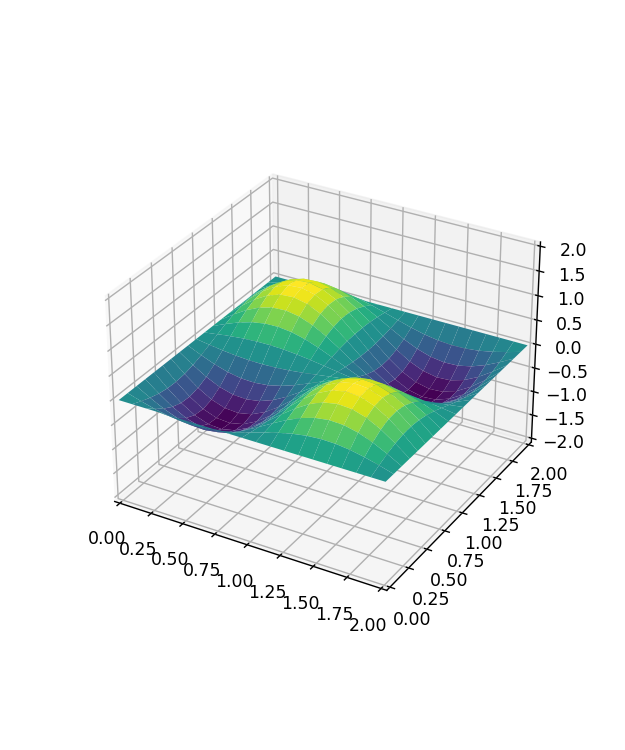

In [8]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,2)
    ax.set_ylim3d(0,2)
    ax.set_zlim3d(-2,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [9]:
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
Animation.save('onda2D.gif', writer=writer)